In [1]:
# Import required libraries
import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output
import plotly.express as px
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
# Read the airline data into pandas dataframe
spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = spacex_df['Payload Mass (kg)'].max()
min_payload = spacex_df['Payload Mass (kg)'].min()

print(spacex_df.columns)
# print unique values of launch site
print(spacex_df['Launch Site'].unique())
launch_sites = ['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40']

Index(['Unnamed: 0', 'Flight Number', 'Launch Site', 'class',
       'Payload Mass (kg)', 'Booster Version', 'Booster Version Category'],
      dtype='object')
['CCAFS LC-40' 'VAFB SLC-4E' 'KSC LC-39A' 'CCAFS SLC-40']


0     7
1     3
2    10
3     4
Name: class, dtype: int64


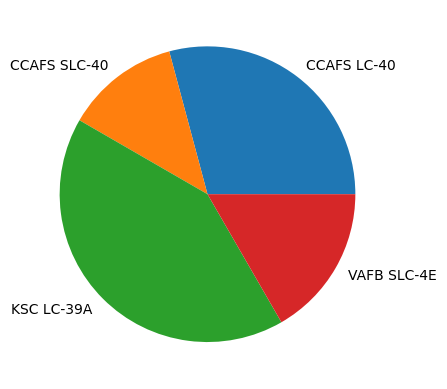

Unnamed: 0  Flight Number  Launch Site  class  Payload Mass (kg)  Booster Version  Booster Version Category
17          19             CCAFS LC-40  1      1952.0             F9 v1.1 B1018    v1.1                        1
18          20             CCAFS LC-40  1      2034.0             F9 FT B1019      FT                          1
20          23             CCAFS LC-40  1      3136.0             F9 FT B1021.1    FT                          1
21          24             CCAFS LC-40  1      4696.0             F9 FT B1022      FT                          1
22          25             CCAFS LC-40  1      3100.0             F9 FT B1023.1    FT                          1
24          27             CCAFS LC-40  1      2257.0             F9 FT B1025.1    FT                          1
25          28             CCAFS LC-40  1      4600.0             F9 FT B1026      FT                          1
Name: count, dtype: int64
7
19


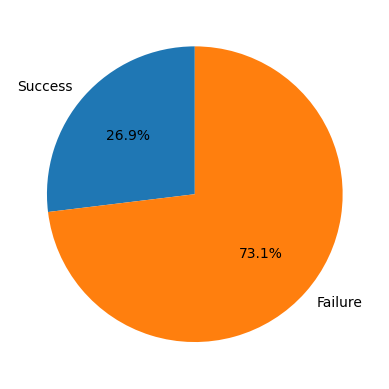

In [ ]:
# testing plots
filtered_df = spacex_df.groupby('Launch Site')['class'].sum().reset_index()
print(filtered_df['class'])
fig = plt.pie(filtered_df['class'], 
    labels=filtered_df['Launch Site'])

plt.show()
launch_sites = ['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40']


launch_data = spacex_df[spacex_df['Launch Site'] == launch_sites[0]]
success = list(launch_data[launch_data['class'] == 1].value_counts()) # generates list of number of times the condition is true (ex: 7 instances that class is equal to 1)
print(success)
print(len(success))
fail = launch_data[launch_data['class'] == 0].value_counts()
#print(success['class'])
print(len(fail))


names = ['Success', 'Failure']
plt.pie([len(success), len(fail)], labels = names, autopct = '%1.1f%%', startangle = 90)
plt.show()

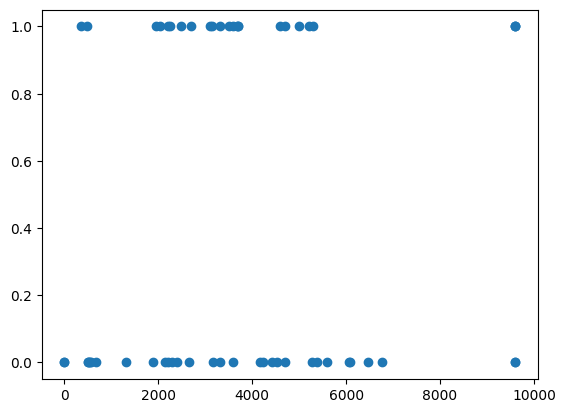

In [65]:
launch_sites = ['CCAFS LC-40', 'VAFB SLC-4E', 'KSC LC-39A', 'CCAFS SLC-40']

filtered_df = spacex_df
plt.scatter(filtered_df['Payload Mass (kg)'], y = filtered_df['class'])
plt.show()

In [3]:
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                    style={'textAlign': 'center', 'color': '#503D36',
                           'font-size': 40}),
            # TASK 1: Add a dropdown list to enable Launch Site selection
            # The default select value is for ALL sites
            dcc.Dropdown(id='site-dropdown',
                    options=[
                        {'label': 'All Sites', 'value': 'ALL'},
                        {'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
                        {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
                        {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
                        {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'}
                    ],
                    value='ALL',
                    placeholder="Select a Launch Site",
                    searchable=True
                    ),
            html.Br(),

            # TASK 2: Add a pie chart to show the total successful launches count for all sites
            # If a specific launch site was selected, show the Success vs. Failed counts for the site
            html.Div(dcc.Graph(id='success-pie-chart')),
            html.Br(),

            html.P("Payload range (Kg):"),
            # TASK 3: Add a slider to select payload range
            #dcc.RangeSlider(id='payload-slider',...)
            dcc.RangeSlider(id='payload-slider',
                min=0, max=10000, step=1000,
                marks={0: '0',
                       100: '100'},
                value=[min_payload, max_payload]),
            
            # TASK 4: Add a scatter chart to show the correlation between payload and launch success
            html.Div(dcc.Graph(id='success-payload-scatter-chart')),
            ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
# Function decorator to specify function input and output
@app.callback(
    Output(component_id='success-pie-chart', component_property='figure'),
    Input(component_id='site-dropdown',component_property='value'))

def get_pie_chart(entered_site):
    filtered_df = spacex_df.groupby('Launch Site')['class'].sum().reset_index()
    if entered_site == 'ALL':
        fig = px.pie(filtered_df, values='class', 
            names='Launch Site', 
            title='Total Successful Launches by Site')
        return fig
    else:
        launch_data = spacex_df[spacex_df['Launch Site'] == entered_site]
        fig = px.pie(launch_data, values='class', 
            names='class', 
            title='Total Successful Launches at Site %s' % entered_site)
        return fig

# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
# Function decorator to specify function input and output
@app.callback(
    Output(component_id='success-payload-scatter-chart', component_property='figure'),
    [Input(component_id='site-dropdown', component_property='value'), Input(component_id="payload-slider", component_property="value")])

def get_success_payload_scatter_chart(entered_site):
    if entered_site == 'ALL':
        fig = px.scatter(spacex_df, 
                         x = 'Payload Mass (kg)',
                         y = 'class', 
                         color = 'Booster Version Category',
                         title = 'Correlation between Payload and success for all Sites')
        return fig
    else:
        launch_data = spacex_df[spacex_df['Launch Site'] == entered_site]
        fig = px.scatter(launch_data, 
                         x = 'Payload Mass (kg)',
                         y = 'class', 
                         color = 'Booster Version Category',
                         title = 'Correlation between Payload and Success for Site %s ' % entered_site)
        return fig
    
# Run the app
if __name__ == '__main__':
    app.run()

OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run.